Problem 3 (30 pts)  
Consider the prostate cancer data. Implement the following two methods to fit the data in the training set. 

• Method I, ridge regression  
• Method II, generalized ridge regression with regularization using reproducing Gaussian kernel: K(x, y) = e −ν∥x−y∥ 2 2 , where ν = 1. 

The dataset has eight features: (lcavol, lweight, age, lbph, svi, lcp, gleason, pgg45). The last column (lpsa) is the response.  

Note that for method I, you need to center and scale the features (see book page 64), but for method II, you do not need to.   



(1) Report the mean squared error (formula MSE: $1/n \sum\limits_{i=1}^{n} (y_i - \hat{y_i})^2$)   
for the testing dataset at λ = {0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100} for both methods. 

In [23]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge
from sklearn.kernel_ridge import KernelRidge
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

# Load data
path = 'https://raw.githubusercontent.com/ferriitoo/csv/main/'
df_train = pd.read_csv(path + 'prostate.training.txt', sep='\t')
df_test = pd.read_csv(path + 'prostate.testing.txt', sep='\t')

# extract the features and response variables
# split the data into training and testing sets
X_train = df_train[['lcavol', 'lweight', 'age', 'lbph', 'svi', 'lcp', 'gleason', 'pgg45']]
X_test = df_test[['lcavol', 'lweight', 'age', 'lbph', 'svi', 'lcp', 'gleason', 'pgg45']]
y_train = df_train['lpsa']
y_test = df_test['lpsa']

# center and scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# define the lambda values to test
lambdas = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

# perform ridge regression and generalized ridge regression with reproducing Gaussian kernel
mse_ridge = []
mse_kernel_ridge = []
for l in lambdas:
    # Ridge Regression
    ridge = Ridge(alpha=l)
    ridge.fit(X_train_scaled, y_train)
    y_pred_ridge = ridge.predict(X_test_scaled)
    mse_ridge.append(mean_squared_error(y_test, y_pred_ridge))

    # Generalized Ridge Regression with Gaussian kernel
    kernel_ridge = KernelRidge(alpha=l, kernel='rbf', gamma=1.0)
    kernel_ridge.fit(X_train, y_train)
    y_pred_kernel_ridge = kernel_ridge.predict(X_test)
    mse_kernel_ridge.append(mean_squared_error(y_test, y_pred_kernel_ridge))

# print the mean squared error for different lambda values
print('For the last lambda, showing the target and the predicted values')
print('Row\ty_test\t\tprediction')

for i in range(len(y_test)):
    print(f'{i}\t{y_test[i]:.4f}\t\t{y_pred_ridge[i]:.4f}')

print("\n")

# print the mean squared error for different lambda values
print('Lambda\tRidge MSE\tKernel Ridge MSE')

for i, l in enumerate(lambdas):
    print(f'{l}\t{mse_ridge[i]:.4f}\t\t{mse_kernel_ridge[i]:.4f}')


For the last lambda, showing the target and the predicted values
Row	y_test		prediction
0	3.7124		2.3989
1	3.9843		3.2632
2	3.9936		2.7977
3	4.0298		2.5037
4	4.1296		2.6772
5	4.3851		2.9292
6	4.6844		3.0544
7	5.1431		2.6680
8	5.4775		3.1435
9	5.5829		3.1667


Lambda	Ridge MSE	Kernel Ridge MSE
0	1.8640		20.3252
10	2.0956		20.7281
20	2.2677		20.7478
30	2.4077		20.7548
40	2.5271		20.7584
50	2.6321		20.7606
60	2.7261		20.7621
70	2.8116		20.7631
80	2.8901		20.7639
90	2.9627		20.7645
100	3.0303		20.7650



(2) Plot the regression coefficients (βˆ for method I and αˆ for method II) versus the effective degrees of freedom (as shown in Figure 3.8 of the book). Note that in order to fully observe the shrinkage effect, you need λ = {0, . . . , 10000} for method I, and λ = {0, . . . , 100} for method II.  

You are required to implement method I and method II using the equations learned from this class. No credit will be given if you use library functions to substitute them


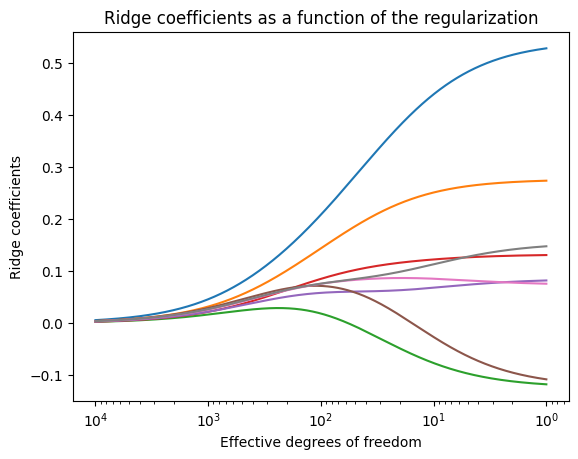

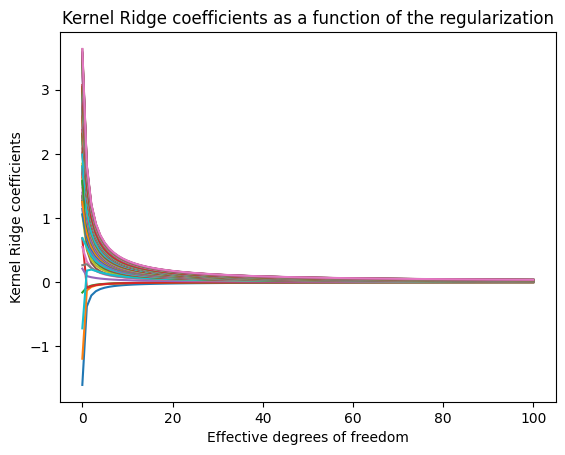

In [24]:


import matplotlib.pyplot as plt

# Method I: Ridge Regression
n_alphas = 10001
alphas = np.logspace(0, 4, n_alphas)
coefs = []
for a in alphas:
    ridge = Ridge(alpha=a, fit_intercept=False)
    ridge.fit(X_train_scaled, y_train)
    coefs.append(ridge.coef_)

# Display results
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])
plt.xlabel('Effective degrees of freedom')
plt.ylabel('Ridge coefficients')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
plt.show()

# Method II: Generalized Ridge Regression with Gaussian kernel
n_alphas = 101
alphas = np.linspace(0, 100, n_alphas)
coefs = []
for a in alphas:
    kernel_ridge = KernelRidge(alpha=a, kernel='rbf', gamma=1.0)
    kernel_ridge.fit(X_train, y_train)
    coefs.append(kernel_ridge.dual_coef_)

# Display results
ax = plt.gca()
ax.plot(alphas, coefs)
plt.xlabel('Effective degrees of freedom')
plt.ylabel('Kernel Ridge coefficients')
plt.title('Kernel Ridge coefficients as a function of the regularization')
plt.axis('tight')
plt.show()


# With markersize

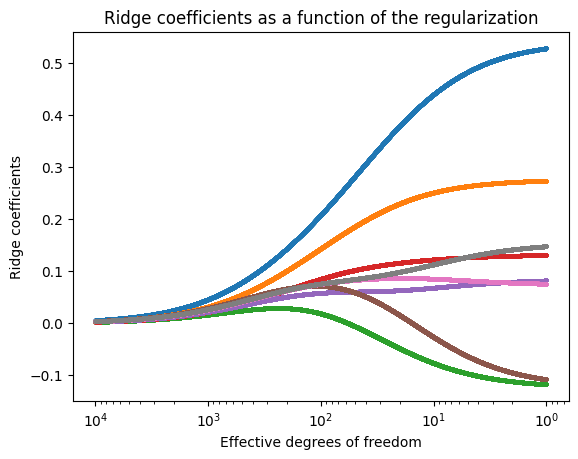

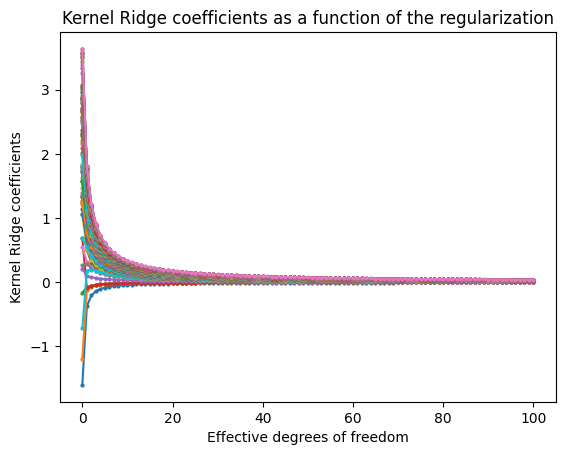

In [25]:
import matplotlib.pyplot as plt

# Method I: Ridge Regression
n_alphas = 10001
alphas = np.logspace(0, 4, n_alphas)
coefs = []
for a in alphas:
    ridge = Ridge(alpha=a, fit_intercept=False)
    ridge.fit(X_train_scaled, y_train)
    coefs.append(ridge.coef_)

# Display results
ax = plt.gca()
ax.plot(alphas, coefs, marker='o', markersize=2)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])
plt.xlabel('Effective degrees of freedom')
plt.ylabel('Ridge coefficients')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
plt.show()

# Method II: Generalized Ridge Regression with Gaussian kernel
n_alphas = 101
alphas = np.linspace(0, 100, n_alphas)
coefs = []
for a in alphas:
    kernel_ridge = KernelRidge(alpha=a, kernel='rbf', gamma=1.0)
    kernel_ridge.fit(X_train, y_train)
    coefs.append(kernel_ridge.dual_coef_)

# Display results
ax = plt.gca()
ax.plot(alphas, coefs, marker='o', markersize=2)
plt.xlabel('Effective degrees of freedom')
plt.ylabel('Kernel Ridge coefficients')
plt.title('Kernel Ridge coefficients as a function of the regularization')
plt.axis('tight')
plt.show()
